### Libraries Being use on this Exercise

In [298]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

- Data import

In [299]:
df = pd.read_csv(r"..//data//netflix_originals.csv")

___

1. Perform the initial analysis on the dataset. Print the first 10 rows of the data
to see how the data looks like.

In [300]:
df.head(10)

,titles,years,genres,imdb,runtime,description,stars,votes,type,original
0,Zumbo's Just Desserts,2016,Reality-TV,6.9,52 min,Amateur Australian chefs compete to impress pa...,"Gigi Falanga, Rachel Khoo, Adriano Zumbo","1,779",TV Show,Netflix
1,Zona Rosa,2019,Comedy,6.0,NaN,Add a Plot,"Ray Contreras, Pablo Morán, Manu Nna, Ana Juli...",33,TV Show,Netflix
2,Young Wallander,2020,"Crime, Drama, Mystery",6.7,NaN,Follow recently graduated police officer Kurt ...,"Adam Pålsson, Leanne Best, Richard Dillane, El...","5,419",TV Show,Netflix
3,You vs. Wild,2019,"Adventure, Reality-TV",6.7,20 min,"In this interactive series, you'll make key de...",Bear Grylls,"1,977",TV Show,Netflix
4,You,2018,"Crime, Drama, Romance",7.8,45 min,"A dangerously charming, intensely obsessive yo...","Penn Badgley, Victoria Pedretti, Ambyr Childer...","134,932",TV Show,Netflix
5,YooHoo to the Rescue,2019,Family,6.9,NaN,"In a series of magical missions, quick-witted ...","Ryan Bartley, Kira Buckland, Lucien Dodge, Kyl...",37,TV Show,Netflix
6,Yankee,2019,Drama,6.0,40 min,"On the run from the police, an Arizona man cro...","Pablo Lyle, Ana Layevska, Pamela Almanza, Seba...",458,TV Show,Netflix
7,Wu Assassins,2019,"Action, Crime, Drama",6.4,44 min,A warrior chosen as the latest and last Wu Ass...,"Iko Uwais, Byron Mann, Li Jun Li, Lawrence Kao","9,336",TV Show,Netflix
8,World's Most Wanted,2020,"Documentary, Crime",7.1,NaN,Heinous criminals have avoided capture despite...,"Jennifer Julian, Thomas Fuentes, Calogero Germ...","1,495",TV Show,Netflix
9,World of Winx,2016,"Animation, Action, Comedy",6.8,30 min,The Winx travel all over the world searching f...,"Rebecca Soler, Alysha Deslorieux, Haven Pascha...",556,TV Show,Netflix


___

2.  Print the shape of the data to find the number of rows and columns.

In [301]:
df.shape

(1517, 10)

___

3. The genre column has multiple values in each row. As a part of cleaning,
extract only the first genre from each row.

In [302]:
df['genres'].head(5)

0               Reality-TV
1                   Comedy
2    Crime, Drama, Mystery
3    Adventure, Reality-TV
4    Crime, Drama, Romance
Name: genres, dtype: object

In [303]:
df['genres'].isnull().sum()

np.int64(1)

In [304]:
df.dropna(subset=['genres'], inplace = True)

In [305]:
genres_clean = []

for rows in df['genres']:
    first_genre = rows.split(',')[0].strip().lower()
    genres_clean.append(first_genre)

df['genres'] = genres_clean

In [306]:
df['genres'].head(5)

0    reality-tv
1        comedy
2         crime
3     adventure
4         crime
Name: genres, dtype: object

In [307]:
df['genres'].sample(10)

68         comedy
941        family
856       mystery
978        comedy
931         drama
379        horror
445    reality-tv
610     adventure
640         crime
540         drama
Name: genres, dtype: object

- To clean the genres column, I first checked for and removed any null values to prevent issues during iteration. Then, I used a loop to go through each row, extracting only the first genre in cases where multiple genres were listed (separated by commas). I standardized the extracted values by stripping whitespace and converting them to lowercase for consistency. Finally, I used `.head()` and `.sample()` to verify that the cleaning process was successful and that the data was properly formatted.

___


4. Find the number of missing values in the data. If there are missing values, what method will you choose for each of the columns? Choose between mean/median/mode imputation, ffill, bfill, dropping the missing values. Please provide clear justification for choosing a particular approach.

In [308]:
df.dtypes

titles          object
years            int64
genres          object
imdb           float64
runtime         object
description     object
stars           object
votes           object
type            object
original        object
dtype: object

In [309]:
df.count()

titles         1516
years          1516
genres         1516
imdb           1511
runtime        1275
description    1516
stars          1488
votes          1515
type           1516
original       1516
dtype: int64

In [310]:
df.isnull().sum()

titles           0
years            0
genres           0
imdb             5
runtime        241
description      0
stars           28
votes            1
type             0
original         0
dtype: int64

In [311]:
df = df.dropna(subset=['imdb', 'stars', 'votes'])
df.isnull().sum()

titles           0
years            0
genres           0
imdb             0
runtime        220
description      0
stars            0
votes            0
type             0
original         0
dtype: int64

In [312]:
runtime_minutes = []
for rows in df['runtime']:
    if pd.isnull(rows):
        runtime_minutes.append(None)
    else:
        minutes = str(rows).split(' ')[0].strip()
        runtime_minutes.append(minutes)
df['runtime'] = runtime_minutes
df.rename(columns={'runtime': 'runtime_minutes'}, inplace=True)


df['runtime_minutes'] = pd.to_numeric(df['runtime_minutes'], errors='coerce')
df['runtime_minutes'] = df['runtime_minutes'].fillna(df.groupby('genres')['runtime_minutes'].transform('mean'))


df.isnull().sum()

titles             0
years              0
genres             0
imdb               0
runtime_minutes    0
description        0
stars              0
votes              0
type               0
original           0
dtype: int64

- For this part of the analysis, I chose to drop the `imdb` and `votes` null columns because they represent only a small portion of the dataset and are highly subjective, which could significantly bias the evaluation of a movie. I also removed the rows with missing values in the `stars` column, since it would be impossible to accurately guess the cast of a specific title without external research, and any assumptions could compromise the reliability of future analysis. Regarding the `runtime` column, I decided to impute missing values using the `mean` runtime of each `genre`. This step was more complex, so I opted to first create a new column to standardize the data. Specifically, I removed the *'min'* text from the runtime entries and extracted only the numerical value, making it explicit in the column name that all values are in minutes. After isolating the numeric values and skipping nulls, I converted the column to a numeric type, and then applied the genre-based mean imputation.

___

5. Plot the histogram for numerical data.


In [313]:
df.dtypes

titles              object
years                int64
genres              object
imdb               float64
runtime_minutes    float64
description         object
stars               object
votes               object
type                object
original            object
dtype: object

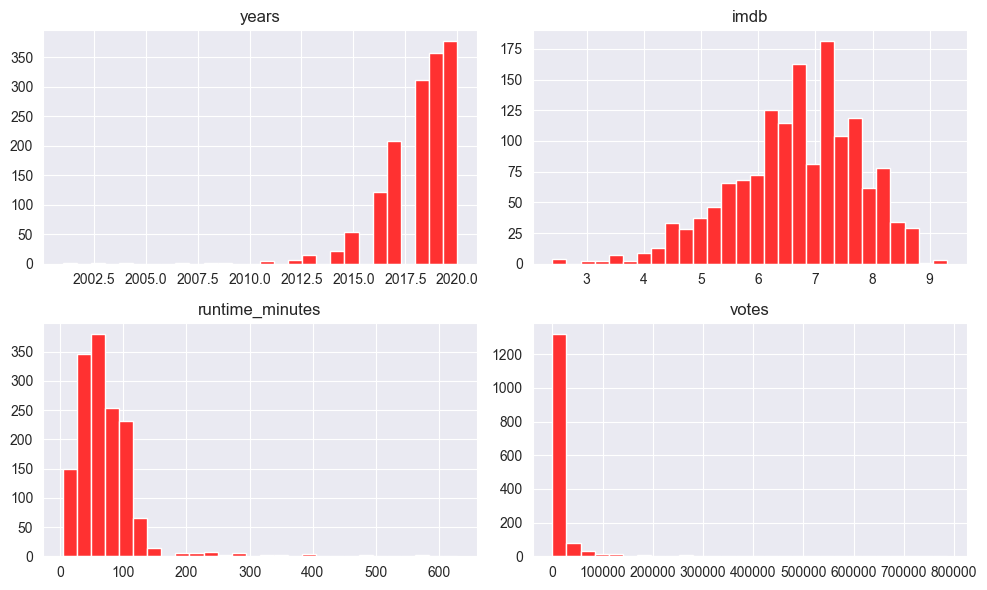

In [314]:
df['votes'] = df['votes'].str.replace(',', '', regex=False)  # remove commas
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')


df.hist(bins = 28, figsize=(10,6), color = '#FF3131')
plt.tight_layout()
plt.show()

- To plot the numerical data in the dataset, I started by checking the data types using `df.dtypes`. This helped me identify which columns were numeric and could be plotted. I noticed that the votes column was stored as an object, even though it represents numerical values. To include it in the histogram, I converted the votes column to a numeric type using `pd.to_numeric()`, handling any invalid values with `errors='coerce'`. After ensuring all relevant columns were numeric, I used `df.hist()` to generate histograms for the numerical features `(years, imdb, runtime_minutes, and votes)`.

___

6. Plot the bar chart for top 10 genres.

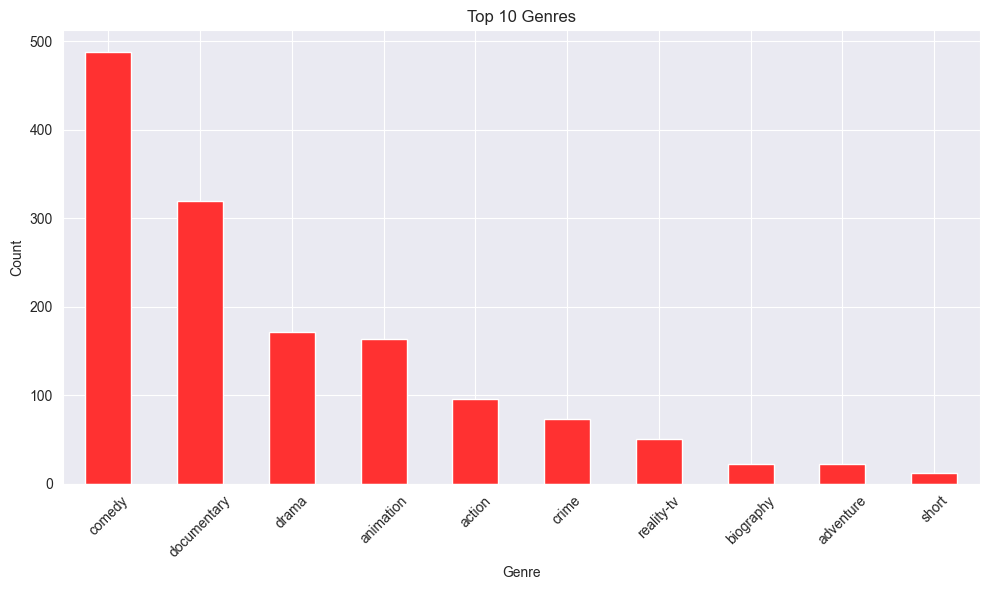

In [315]:
top_ten = df['genres'].value_counts().head(10)


top_ten.plot(kind='bar', figsize=(10,6), color='#FF3131')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Top ten and bar plot 👆

___

7. Plot the line chart for the number of releases per year.

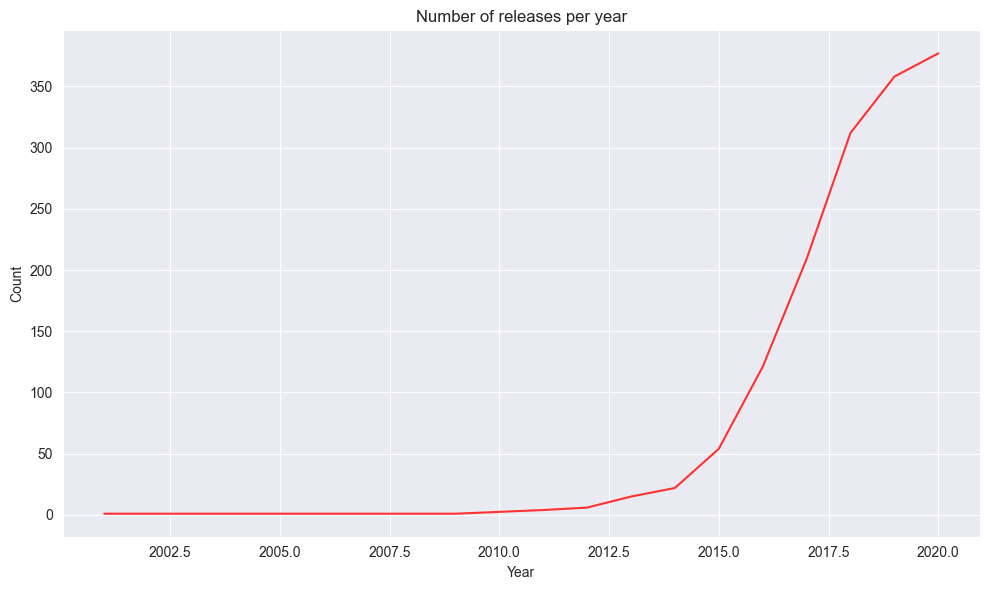

In [316]:
release_year = df.groupby(['years'])['years'].count()


release_year.plot(kind='line', figsize=(10,6), color='#FF3131')
plt.title('Number of releases per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Line chart Releases/Year 👆

___

8. Plot the sunburst chart for the distribution of genres by content type. (Use
plotly library).

In [317]:
fig = px.sunburst(df, path = ['type', 'genres'], title = 'Genres by Content Type', color_discrete_sequence=px.colors.qualitative.Bold, width=700, height=800)
fig.show()

- Sunburst Genres by Content Type 👆

___

9. Perform encoding on the categorical data. Choose between label encoding, one hot encoding or ordinal encoding and provide a clear justification for choosing a particular encoding method.

In [318]:
# ------ Binary label-encode ------
df['original'] = df['original'].map({'Netflix': 1})

# ------ One-Hot encode ------
encoded_df = pd.get_dummies(df, columns=['genres', 'type'])
encoded_df.shape

(1484, 33)

- For the column 'original', I used binary label encoding because it contains only two categories, and mapping it to 0 and 1 is straightforward and efficient. For the 'genres' and 'type' columns, I used one-hot encoding because they are nominal. One-hot encoding prevents the model from assuming any ordinal relationship between categories, which helps avoid bias in training.

___

10. Identify if there are any outliers in the data. If so, handle the outliers.

- X

___

11. If given an option to replace the outliers with 0, would you do that? Why or
why not? Provide clear justification.

- X

___

12. Perform all feature scaling techniques using StandardScaler, MinMaxScaler and RobustScaler. Which method is the most appropriate for this data and why? Please provide a clear explanation.

__Still need to finish, but i know how to do it.__